# GPU benchmark

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.10.0'

In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tf.test.is_built_with_cuda()

True

## Lets now test our GPU

In [5]:
# load the cifar10 dataset
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data

170498071/170498071 [==============================] - 1625s 10us/step


In [6]:
X_train.shape

(50000, 32, 32, 3)

In [10]:
y_train.shape

(50000, 1)

In [11]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [36]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [43]:
import matplotlib.pyplot as plt

def plot_sample(index):
    plt.title(classes[y_train[index][0]])
    plt.imshow(X_train[index])

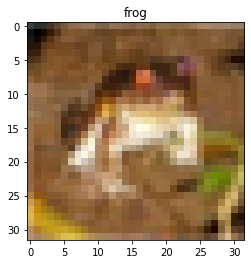

In [44]:
plot_sample(0)

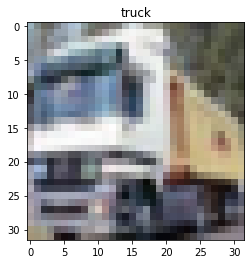

In [45]:
plot_sample(1)

In [46]:
#preprocessing of images

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [47]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [48]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [49]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Model building and training

In [50]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 8s 4ms/step - loss: 1.8128 - accuracy: 0.3515


In [51]:
# define the model seperately for run

def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

### Run the model with CPU (1 epoch)

In [98]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 39s 25ms/step - loss: 1.8134 - accuracy: 0.3538
39.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### Run with GPU (1 epoch)

In [97]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 7s 4ms/step - loss: 1.8157 - accuracy: 0.3530
7.66 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### Lets run same test for 10 epocs

In [95]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.8154 - accuracy: 0.3545
Epoch 2/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.6267 - accuracy: 0.4232
Epoch 3/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.5418 - accuracy: 0.4538
Epoch 4/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.4822 - accuracy: 0.4789
Epoch 5/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.4314 - accuracy: 0.4968
Epoch 6/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.3894 - accuracy: 0.5123
Epoch 7/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.3518 - accuracy: 0.5242
Epoch 8/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.3185 - accuracy: 0.5381
Epoch 9/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.2847 - accuracy: 0.5500
Epoch 10/10
1563/1563 [==============================] - 40s 25m

In [96]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8101 - accuracy: 0.3556
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6229 - accuracy: 0.4277
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5391 - accuracy: 0.4585
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4809 - accuracy: 0.4776
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4302 - accuracy: 0.4970
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3907 - accuracy: 0.5103
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3529 - accuracy: 0.5231
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3166 - accuracy: 0.5378
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2831 - accuracy: 0.5492
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.251